In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.datasets import load_wine
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

#### Load data and convert it into pandas df

In [3]:
wine_data = load_wine()

In [4]:
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
labels = wine_data.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#### Normalization
Note that data are not normalized, therefore each features need to be normalized to have zero mean and unit variance

In [19]:
X = df.values
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

df2 = pd.DataFrame(data=X_norm, columns=wine_data.feature_names)
df2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


#### Covariance matrix 

In [6]:
def compute_cov_mat(data_mat, is_plot=True):
    # compute the covariance matrix 
    cov_mat = np.cov(data_mat.T)

    # NOTE: it is same as:
    # data_mat = data_mat - data_mat.mean(axis=0, keepdims=True) # remove the mean feature-wise (or, columnwise) 
    # cov_mat = (np.matmul(data_mat.T, data_mat)) / (data_mat.shape[0] - 1) 

    # plot the covariance matrix
    if is_plot:
        plt.figure(figsize=(7, 7))
        plt.imshow(cov_mat)
        plt.title("Covariance matrix")
        plt.xticks(np.arange(0, cov_mat.shape[0], 1))
        plt.yticks(np.arange(0, cov_mat.shape[0], 1))
        plt.colorbar()
        plt.show()
    
    return cov_mat

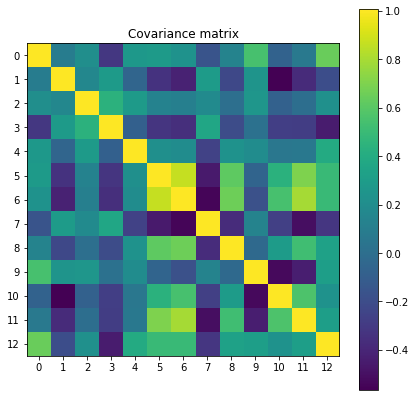

In [7]:
cov_mat = compute_cov_mat(X_norm)

#### Compute Eigenvalues and eigenvectors of the covariance matrix

In [8]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

#### Plot explained variance of each principal components 
Plot normalized eigenvalues (variance) of each component. Note: we want to keep at least 95% of total variance, so 
check from the cumulative sum, how many principal components to keep. For visualization purpose, keep only either 
2 or 3 principal components. 

In [9]:
tot_val = sum(eigen_vals)
var_vals = [(var_val/tot_val) for var_val in sorted(eigen_vals, reverse=True)]
cum_var_vals = np.cumsum(var_vals)

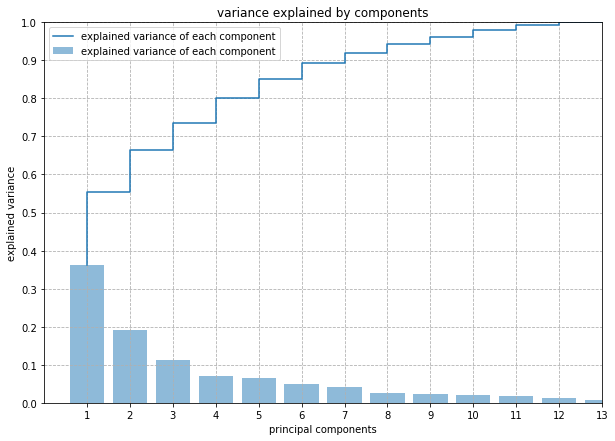

In [10]:
plt.figure(figsize=(10, 7))
plt.bar(range(1, cov_mat.shape[0]+1), var_vals, alpha=0.5, 
        label='explained variance of each component')
plt.step(range(1, cov_mat.shape[0]+1), cum_var_vals, 
         label='explained variance of each component')

plt.title("variance explained by components")
plt.xlabel("principal components")
plt.ylabel("explained variance")
plt.xticks(np.arange(1, 14, 1))
plt.yticks(np.arange(0, 1.0001, 0.1))
plt.xlim(0, cov_mat.shape[0])
plt.ylim(0, 1)
plt.legend(loc='upper left')
plt.grid(linestyle='--')
plt.show()

#### Project data onto principle components 
Note: eigenvalues/diagonals are not sorted while all the off diagonal values are zero now.

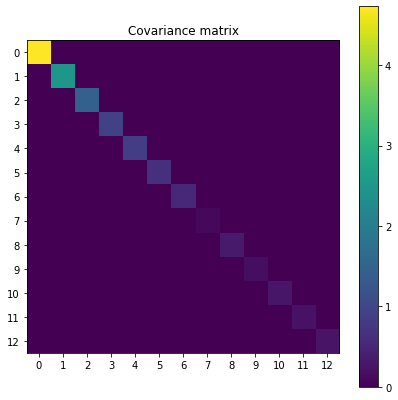

In [11]:
X_proj = np.dot(X_norm, eigen_vecs)
cov_mat_prj = compute_cov_mat(X_proj)

#### Sort both eigenvalues and eigenvectors acc to eigenvalues in a descending order

In [12]:
def sort_eigen(eigen_vals, eigen_vecs):
    # get the indices in descending order from eigen values
    inds_descend = np.flip(np.argsort(eigen_vals))
    eigen_vals = eigen_vals[inds_descend]
    # in the same order, sort eigen-vectors
    eigen_vecs = eigen_vecs[:, inds_descend] 
    return eigen_vals, eigen_vecs

In [13]:
sort_eigen_vals, sort_eigen_vecs = sort_eigen(eigen_vals, eigen_vecs)

#### With the sorted eigenvalues and eigenvectors project the data again
See the difference in the covariance matrix now: Values are in the descending order!!!

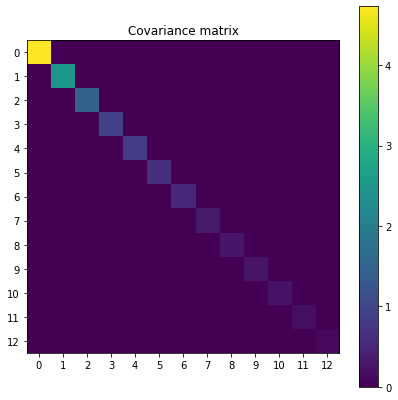

In [14]:
X_proj = np.dot(X_norm, sort_eigen_vecs)
cov_mat_prj = compute_cov_mat(X_proj)

#### Generate data with the most dominant eigenvalues /principal components/ variance in the data
#### Dimensionality Reduction part of PCA 
For dimensional reduction, keep at least 95% of the total variance! therefore, check from above cumulative sum plot, 
how many principal components to keep otherwise for visualization, pick either 2 or 3 principal components. 

In [15]:
def pca_dim_red(data_mat, ncomps=3):
    # from the normalized data, compute covariance matrix 
    cov_mat = compute_cov_mat(data_mat, is_plot=False)
    
    # compute eigenvalues and eigenvectors of covariance matrix 
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) 
    
    # sort the eigen-values and eigen-vectors in the descending order of eigen-values 
    eigen_vals, eigen_vecs = sort_eigen(eigen_vals, eigen_vecs)
    
    # take the upper most eigen-vectors / principal components and multiple it 
    # with the data matrix
    X_proj = np.dot(X_norm, sort_eigen_vecs[:,:ncomps])
    
    return X_proj

In [16]:
X_red = pca_dim_red(X_norm, ncomps=3)

In [17]:
X_red.shape

(178, 3)

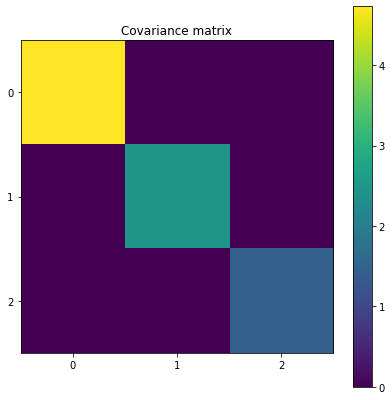

In [18]:
cov_mat_red = compute_cov_mat(X_red)

#### Scatter plot of three most dominant principal components